<a href="https://colab.research.google.com/github/Gth1205/projects/blob/master/Building_Plan_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
  model = tf.keras.models.Sequential([
          #first convolution
          tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3)),
          tf.keras.layers.MaxPooling2D(2,2),
          #second convolution
          tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          #third convolution
          tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          #Flatten the results 
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, activation = 'relu'),
          tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])

  from tensorflow.keras.optimizers import RMSprop

  model.compile(loss= 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['acc'])


  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  #rescaling all images by 1./255
  train_datagen = ImageDataGenerator(rescale = 1/255)
  #Flow training images in batches of 128 using train_datagen generator
  train_generator = train_datagen.flow_from_directory(
    '/tmp/h-or-s',
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'binary')

In [1]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()


for fn in uploaded.keys():

  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

Using TensorFlow backend.


Saving pug-801826_640.jpg to pug-801826_640.jpg


Saving James_Baxter_House_(plans).png to James_Baxter_House_(plans) (2).png


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


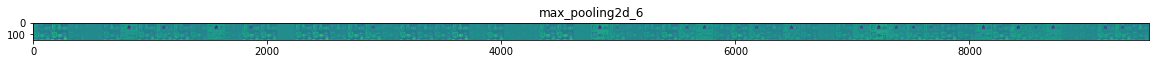

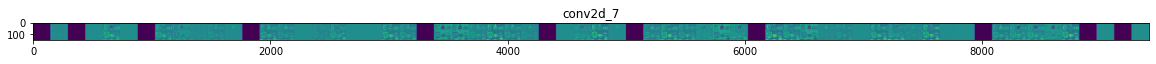

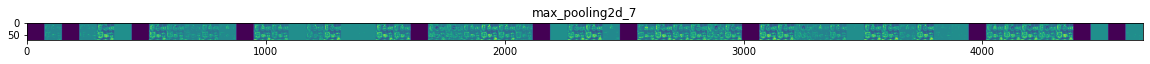

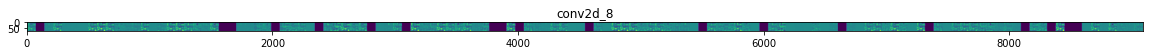

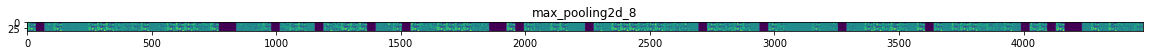

In [8]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from google.colab import files
from keras.preprocessing import image

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

model = tf.keras.models.Sequential([
          #first convolution
          tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (300,300,3)),
          tf.keras.layers.MaxPooling2D(2,2),
          #second convolution
          tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          #third convolution
          tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          #Flatten the results 
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, activation = 'relu'),
          tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss= 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['acc'])

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

uploaded = files.upload()

for fn in uploaded.keys():

  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')